# Notebook 05: Regression - Predicting Sales for New Models

This notebook develops a regression model and evaluates predictions for new model sales using attributes for watches in datasets cleaned in [Notebook 1: Data Cleaning](01_data_cleaning.ipynb).

In [5]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.impute import KNNImputer

# custom function imports
from custom_functions import *
from regression_custom_functions import *

In [6]:
# Import data
df_all_models = pd.read_csv('../data/cleaned_datasets/df_models.csv')

time_now = datetime.datetime.now()
df_models = df_all_models.dropna(subset=time_now.strftime(f"%Y-%m"))

In [7]:
#df_models = df_models.merge(pd.DataFrame(return_date_col(df_models.set_index('style_id')).T.sum(),columns=['overall_sales']),left_on = 'style_id',right_index=True)

### Train-test split

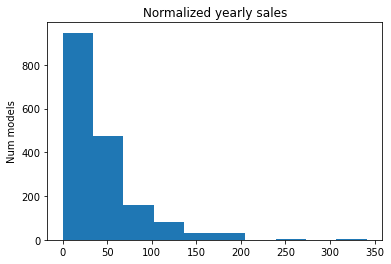

In [8]:
# Calculate a target value - Normalized Sales, which is the overall sales divided by the number of years that the model was sold
df_models = calc_norm_yearly_sales(df_models,4,2019)

In [9]:
attributes = ['max_cart_qty','country_of_origin','warranty', 'band_color', 'band_material',
       'case_material', 'dial_color', 'case_size', 'gender', 'color',
       'retail_price', 'collection', 'clasp_type', 'water_resistance',
       'movement_type']

X = df_models[attributes]

# Check no null values in X
df_models[df_models.isna()].sum().sum() #Should return 0

0.0

In [10]:
y = df_models['norm_yearly_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Baseline Model

In [11]:
baseline = np.full_like(y_test, y_train.mean())

In [12]:
rmse_baseline = mean_squared_error(y_test,baseline,squared=False)
rmse_baseline

34.324684839077996

In [13]:
residuals_baseline = y_test - baseline

In [14]:
r2_baseline = r2_score(y_test,baseline)
r2_baseline

-0.01253073615121747

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


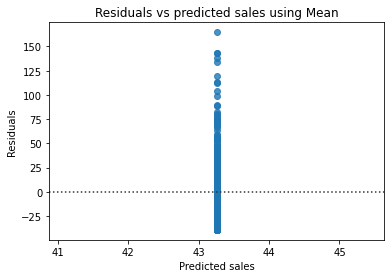

In [15]:
sns.residplot(x = baseline,
              y = residuals_baseline,
              lowess = True,
              line_kws = {'color':'red'})
plt.title('Residuals vs predicted sales using Mean')
plt.xlabel('Predicted sales')
plt.ylabel('Residuals');

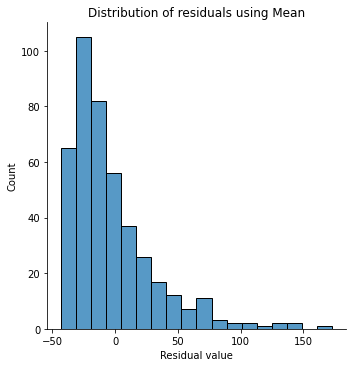

In [16]:
# Create residuals histogram to check for normal distribution of errors
sns.displot(residuals_baseline, binwidth =12)
plt.title('Distribution of residuals using Mean')
plt.xlabel('Residual value');

Definitely not normally distributed. There is a tail for the higher sales models.

## Exploring different models

In [17]:
models = [('lr',LinearRegression()), ('ridge',RidgeCV(alphas=np.logspace(0,5,100))),
          ('lasso',LassoCV(alphas=np.arange(0.001,10,1))),('knn',KNeighborsRegressor(n_neighbors=3)),
          ('rf', RandomForestRegressor(n_estimators=500)), ('ab', AdaBoostRegressor(base_estimator=RandomForestRegressor())),
          ('et', ExtraTreesRegressor(n_estimators=200)),('mnb', MultinomialNB(alpha=0.1)]

In [18]:
y_test

300     28.267594
1075    41.505741
535     53.805277
1318     0.000000
561     52.066305
          ...    
1713    21.522790
818     65.868841
1110     0.000000
1420     0.000000
530     50.339088
Name: norm_yearly_sales, Length: 431, dtype: float64

In [19]:
best_rmse = 1000000
df_preds = pd.DataFrame(y_test.values, columns=['y_test'])

LinearRegression()
Train score: 0.630387611049275
Test raw score: -3.5991636488264335e+24
Test cleaned score: 0.22646354906088917
Test cleaned RMSE: 30.00149126090564
Baseline RMSE: 34.324684839077996

RidgeCV(alphas=array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+0...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


Train score: 0.5967109589335438
Test raw score: 0.2993431766419864
Test cleaned score: 0.30402158848647176
Test cleaned RMSE: 28.457735261174385
Baseline RMSE: 34.324684839077996

LassoCV(alphas=array([1.000e-03, 1.001e+00, 2.001e+00, 3.001e+00, 4.001e+00, 5.001e+00,
       6.001e+00, 7.001e+00, 8.001e+00, 9.001e+00]))


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113560.18701662723, tolerance: 200.27904278108096
  model = cd_fast.enet_coordinate_descent_gram(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

Train score: 0.5101018623801877
Test raw score: 0.28477275204459984
Test cleaned score: 0.2854248285426607
Test cleaned RMSE: 28.835428647634583
Baseline RMSE: 34.324684839077996

KNeighborsRegressor(n_neighbors=3)
Train score: 0.6308937370270882
Test raw score: 0.005853649612863054
Test cleaned score: 0.005853649612863054
Test cleaned RMSE: 34.01164299877615
Baseline RMSE: 34.324684839077996


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



RandomForestRegressor(n_estimators=500)
Train score: 0.8904837114160412
Test raw score: 0.3639839204080666
Test cleaned score: 0.3639839204080666
Test cleaned RMSE: 27.204233784515544
Baseline RMSE: 34.324684839077996

AdaBoostRegressor(base_estimator=RandomForestRegressor())


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train score: 0.7154715368438725


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Test raw score: 0.16181040256955548


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Test cleaned score: 0.16181040256955548
Test cleaned RMSE: 31.230115034104543
Baseline RMSE: 34.324684839077996

ExtraTreesRegressor(n_estimators=200)
Train score: 0.9527187645115884
Test raw score: 0.054303274091332954
Test cleaned score: 0.054303274091332954
Test cleaned RMSE: 33.17251455844547
Baseline RMSE: 34.324684839077996

Best RMSE: 27.204233784515544
Best model: rf


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [3, 5, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


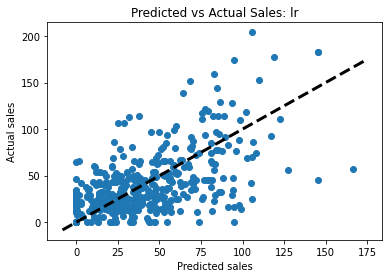

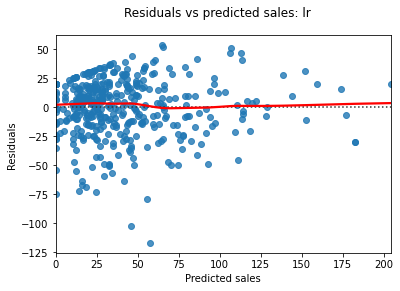

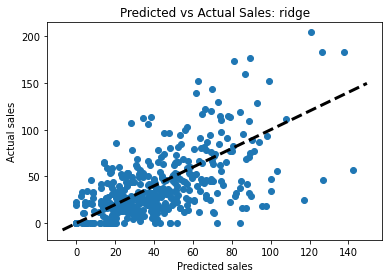

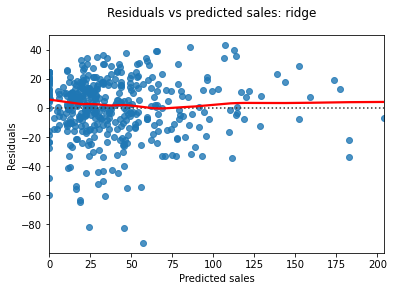

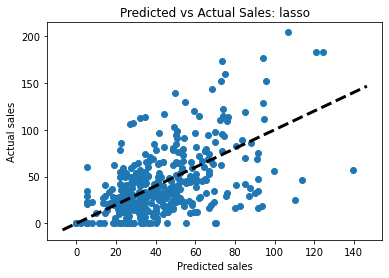

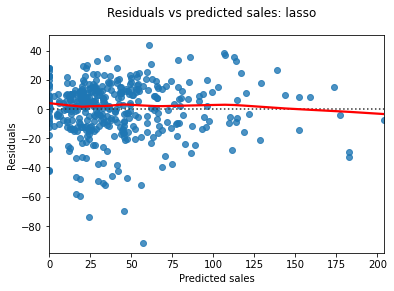

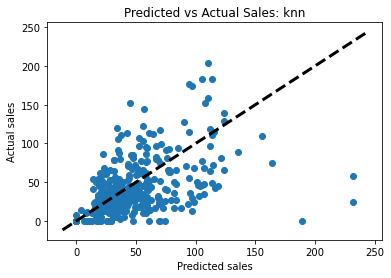

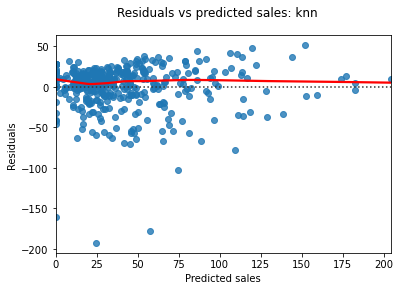

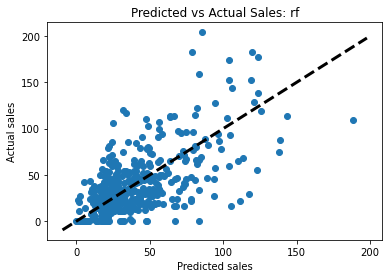

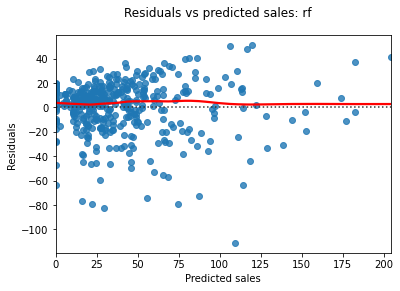

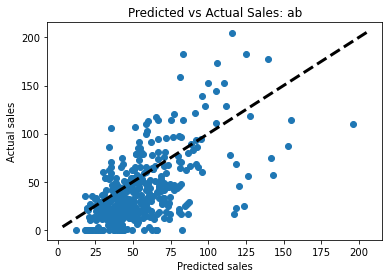

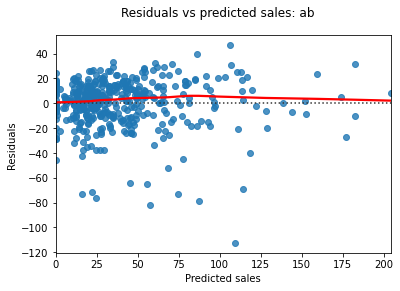

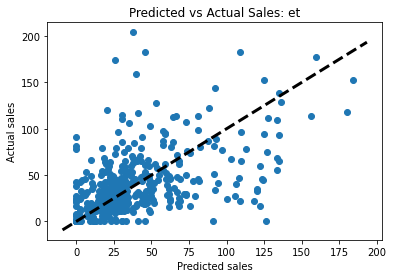

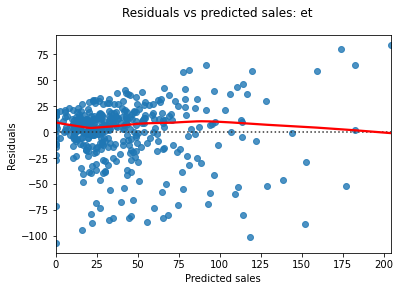

In [20]:
for model in models:
    preds, rmse = create_evaluate_model(model, X_train, X_test, y_train, y_test)
    df_preds[f'preds_{model[0]}'] = preds
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model[0]
        
print('Best RMSE:', best_rmse)
print('Best model:', best_model)

In [21]:
df_preds_avg = df_preds[['preds_ridge','preds_rf']]
df_preds['avg'] = 0
for pred in df_preds_avg:
    df_preds['avg'] = df_preds['avg'] + df_preds_avg[pred]
df_preds['avg'] = df_preds['avg']/len(df_preds_avg.columns)

In [22]:
df_preds

,y_test,preds_lr,preds_ridge,preds_lasso,preds_knn,preds_rf,preds_ab,preds_et,avg
0,28.267594,28.745841,33.221122,34.238207,29.812890,32.612949,42.311679,32.759392,32.917036
1,41.505741,65.675529,56.971426,51.142497,73.858801,73.592393,77.068498,94.012254,65.281909
2,53.805277,47.214591,50.867920,52.234868,32.538933,39.016863,48.950973,32.424741,44.942392
3,0.000000,13.230216,19.396256,21.668378,9.495222,13.953591,37.089925,13.236591,16.674924
4,52.066305,60.745841,60.535339,50.091723,60.963625,62.173772,61.445218,59.528126,61.354555
...,...,...,...,...,...,...,...,...,...
426,21.522790,2.714591,17.075122,13.180743,42.298349,26.282390,19.640533,28.269593,21.678756
427,65.868841,38.050529,41.892971,43.628784,83.160785,17.946396,35.648806,9.624416,29.919684
428,0.000000,0.000000,14.060104,34.234360,25.483706,22.392488,39.390404,30.614317,18.226296
429,0.000000,0.000000,7.811042,19.360514,28.148773,16.496908,22.864797,2.555831,12.153975


In [23]:
mean_squared_error(y_test,df_preds['avg'],squared=False)

26.15669840720604

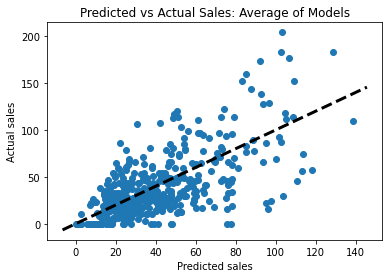

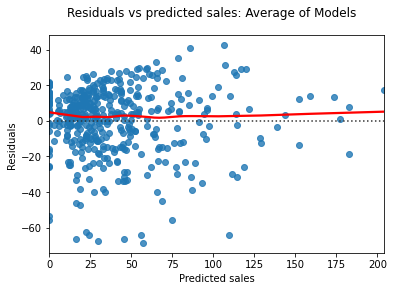

In [24]:
plot_preds(df_preds['y_test'],df_preds['avg'],'Average of Models')

## Production model

In [25]:
# Create new data frame with attributes from model to make predictions for new models in proposal
df_new_models = df_all_models[df_all_models[time_now.strftime(f"%Y-%m")].isna()]
test = df_new_models[attributes]

# Impute missing retail prices
knn_imp = KNNImputer()
test['retail_price'] = knn_imp.fit_transform(test[['retail_price']])

# Create a column transformer to one hot encode categorical variables
categorical_attributes = []
for attribute in X_train.columns:
    try:
        int(attribute)
    except:
        categorical_attributes.append(attribute)

# Setup pipeline for preprocessing and modeling
ct = ColumnTransformer([('ohe',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),
                         categorical_attributes)],
                      remainder='passthrough',
                      verbose_feature_names_out=False)
pipe = Pipeline([
    ('ct',ct),
    ('ss',StandardScaler()),
    ('rf',RandomForestRegressor(n_estimators=500))
])

# Fit model with train set
pipe.fit(X_train,y_train)

# Generate predictions for new models
preds = pipe.predict(test)

# Save new model predictions (monthly order) to csv
new_model_predictions = df_new_models[['style_id']]
new_model_predictions['monthly_predictions_Q3'] = preds/12

new_model_predictions.to_csv('../data/predictions/new_models_predictions.csv',index=False)

/var/folders/0z/k5klxhhj5j9g8hc5ygn0nwsr0000gn/T/ipykernel_5685/2853454165.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['retail_price'] = knn_imp.fit_transform(test[['retail_price']])
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 7, 11, 12] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/var/folders/0z/k5klxhhj5j9g8hc5ygn0nwsr0000gn/T/ipykernel_5685/2853454165.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

<AxesSubplot:>

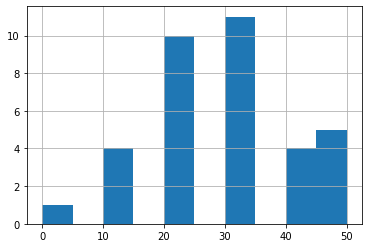

In [26]:
df_new_models.planned_order.hist()

(array([12.,  1.,  7.,  6.,  3.,  0.,  3.,  1.,  1.,  1.]),
 array([ 0.35651121,  4.68339927,  9.01028733, 13.3371754 , 17.66406346,
        21.99095152, 26.31783958, 30.64472764, 34.97161571, 39.29850377,
        43.62539183]),
 <BarContainer object of 10 artists>)

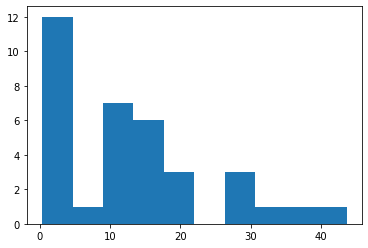

In [27]:
plt.hist(preds)

<AxesSubplot:>

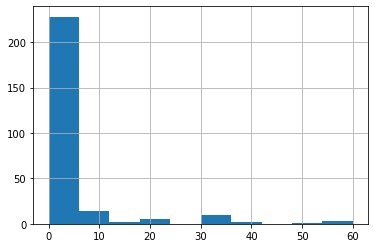

In [ ]:
df_models.planned_order.hist()